In [1]:
from IPython.display import Image
from skimage.feature import corner_peaks

import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

In [2]:
from skimage import filters
from skimage.util.shape import view_as_blocks
from scipy.spatial.distance import cdist
from scipy.ndimage.filters import convolve

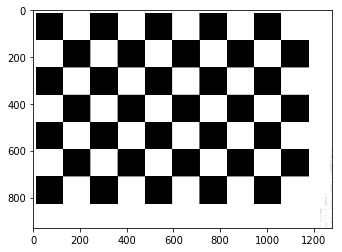

In [6]:
img = cv2.imread('chessboard.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')

In [27]:
img.shape

(930, 1279)

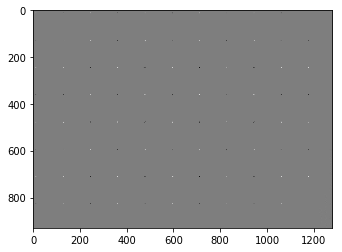

In [16]:
kernel = np.ones((3,3))
dx = filters.sobel_v(img)
dy = filters.sobel_h(img)

A = convolve(dx**2,kernel)
B = convolve(dx*dy,kernel)
plt.imshow(B,cmap='gray')

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.2893157e-07
   2.9488136e-09  1.1636762e-10]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0907984e-08
   5.5413185e-10  1.7678711e-10]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.9057392e-11
   6.8456959e-12  1.1076913e-11]]


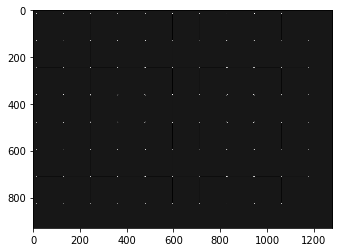

In [24]:
dst = cv2.cornerHarris(img,2,3,0.04)
plt.imshow(dst,cmap='gray')
dst1 = cv2.dilate(dst,None)
plt.imshow(dst1,cmap='gray')



In [43]:
v = dst > 0.01*dst.max()
print (v.shape)
print(v)
print(img)
print(img.shape)
print(img[dst>0.01*dst.max()])



(930, 1279)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 254 252]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(930, 1279)
[ 39  12  23 167  22  11  21 161 116  19  39 218 120  23  91 244  62   5
  80 244   4   0   1 178 255 160   0   0   2 168 255  94   0   0  17 225
 100   0   0   0  59 244  45   0  44 245 255 253 255 255 254 255 255 254
 255 247 255  13   0   3 106 172 172  97   0   0   4 100 179 154 163  59
   5   2  22 131 176 164  70   6   0  33 161 168 151  36   0  33 156 167
 225 154 158  91  13   0  17 105 174  95   9   2   4 124 168  52  11   0
   8 119 162 144  19  11   0   8  33 154 162 143  24   8   0   7 106 255
 255 254 

In [ ]:
def harris_detect(img_path,blockSize,ksize,k,threshold):
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    img32 = np.float32(img)
    crn = cv2.cornerHarris(img32,blockSize,ksize,k)
    
    img[]
    